Average Rating: 2.195744680851064
Positive Count: 44
Negative Count: 93
Neutral Count: 10
Mixed Count: 88


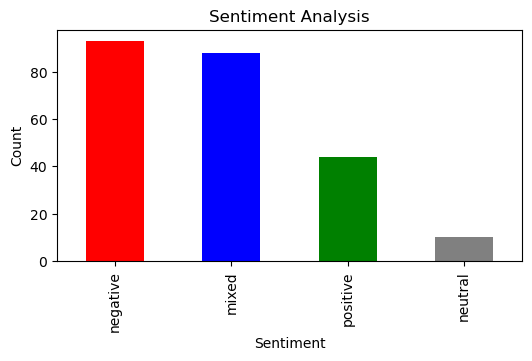

In [2]:
import pandas as pd
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt


# Replace these with your Azure Text Analytics credentials
azure_key = "a308c79848c54a2cb03e3023ffedff10"
azure_endpoint = "https://web-data-chinmay.cognitiveservices.azure.com/"

# Initialize the Text Analytics client
credential = AzureKeyCredential(azure_key)
text_analytics_client = TextAnalyticsClient(endpoint=azure_endpoint, credential=credential)

# Function to perform sentiment analysis on a text
def analyze_sentiment(text):
    response = text_analytics_client.analyze_sentiment([text])
    sentiment = response[0].sentiment
    return sentiment

# Read the CSV file into a DataFrame (assuming 'reviews.csv' as your file)
file_path = 'GAP reviews.csv'
df = pd.read_csv(file_path)

# Create a list to store individual review sentiments
individual_sentiments = []

# Iterate through rows and analyze each review
for _, row in df.iterrows():
    review = row['Review Text']
    sentiment = analyze_sentiment(str(review).strip())  # Strip leading/trailing whitespace
    individual_sentiments.append(sentiment)

# Add the individual sentiment results to the DataFrame
df['Individual_Sentiment'] = individual_sentiments

# Calculate the overall sentiment (e.g., majority sentiment)
def calculate_overall_sentiment(sentiments):
    # Perform your logic here to calculate overall sentiment (e.g., majority vote)
    # For simplicity, this example uses the majority sentiment as overall sentiment.
    sentiment_counts = pd.Series(sentiments).value_counts()
    overall_sentiment = sentiment_counts.idxmax()
    return overall_sentiment

overall_sentiment = calculate_overall_sentiment(individual_sentiments)

# Add the overall sentiment to the DataFrame
df['Overall_Sentiment'] = overall_sentiment

# Calculate the average rating
average_rating = df['Rating'].mean()

# Print the average rating
print("Average Rating:", average_rating)

sentiment_counts = df['Individual_Sentiment'].value_counts()
positive_count = sentiment_counts.get('positive', 0)
negative_count = sentiment_counts.get('negative', 0)
neutral_count = sentiment_counts.get('neutral', 0)
mixed_count = sentiment_counts.get('mixed', 0)

# Display the counts
print("Positive Count:", positive_count)
print("Negative Count:", negative_count)
print("Neutral Count:", neutral_count)
print("Mixed Count:", mixed_count)

sentiment_counts = df['Individual_Sentiment'].value_counts()

# Create a bar graph
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['Red', 'blue', 'green', 'gray'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the bar graph
plt.show()